## 1. Problem definition
Start with explaining the problem and how you plan the address it using machine learning.

## 2. Data description
Explain the source of data, what each record represents, number of records, and detailed descriptions of all variables including at least a one-sentence description and data type. Specify which variables will be used in analysis.

Source of Data: We downloaded this data set from Kaggle, which is a subset of a Cleaveland hospital database.
<br>
Record Represenation: Each record represents individual characteristics of an single patient and if they have heart disease or not.
<br>
Number of Records: 303
<br>
Variable Descriptions:
<br>
$\;\;\;\;\;\;$age: The patient's age (years); dtype=int64
<br>
$\;\;\;\;\;\;$sex: The patient's gender (1=male, 0=female); dtype=int64
<br>
$\;\;\;\;\;\;$cp: The patient's experienced chest pain (Value 0: typical angina, Value 1: atypical angina, Value 2: non-anginal pain, Value 3: asymptomatic); $\;\;\;\;\;\;$dtype=int64
<br>
$\;\;\;\;\;\;$trestbps: The patient's resting blood pressure (mm HG on admission to hospital); dtype=int64
<br>
$\;\;\;\;\;\;$chol: The patient's cholesterol measurement in mg/dl; dtype=int64
<br>
$\;\;\;\;\;\;$fbs: The patient's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false); dtype=int64
<br>
$\;\;\;\;\;\;$restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular $\;\;\;\;\;\;$hypertrophy by Estes' criteria); dtype=int64
<br>
$\;\;\;\;\;\;$thalach: The patient's maximum heart rate achieved; dtype=int64
<br>
$\;\;\;\;\;\;$exang: The patient's exercise induced angina (1=yes, 0=no); dtype=int64
<br>
$\;\;\;\;\;\;$oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot); dtype=int64
<br>
$\;\;\;\;\;\;$slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)); dtype=int64
<br>
$\;\;\;\;\;\;$ca: The number of major vessels (0-3); dtype=int64
<br>
$\;\;\;\;\;\;$thal: The patient's presence of a blood disorder called thalssemia (3 = normal; 6 = fixed defect; 7 = reversable defect); dtype=int64
<br>
$\;\;\;\;\;\;$target: The patient's presence of heart disease (0 = no, 1 = yes); dtype=int64
<br>
We will exclude variables "oldpeak" and "slope".




## 3. Method of analysis
Explain the selected method (classification, regression, or clustering).
<ul><li>Classification: identify the label (i.e., dependent variable) and all predictors.
<li>Regression: identify the label (i.e., dependent variable) and all predictors.
<li>Clustering: explain what kind of clusters you expect to find and how those clusters would help you solve the stated problem.

## 4. Loading data
Load your dataset using a relative path. 

In [111]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pylab as plt
from dmba import classificationSummary, gainsChart, liftChart
from dmba.metric import AIC_score
from sklearn.metrics import classification_report
df = pd.read_csv('clean_data.csv')
df = df.drop(df.columns[0],axis=1)
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score


Import libraries and dataset. We dropped first column because it represented IDs.

In [112]:
df.head()

,age,sex,cp,trestbps,chol,fbs,thalach,exang,ca,thal,target
0,63,1,3,145,233,1,150,0,0,1,1
1,37,1,2,130,250,0,187,0,0,2,1
2,41,0,1,130,204,0,172,0,0,2,1
3,56,1,1,120,236,0,178,0,0,2,1
4,57,0,0,120,354,0,163,1,0,2,1


## 5. Descriptive statistics
Run descriptive statistics. Explain how the output will guide your analysis.

Using this descriptive chart below, we emphasize on taking note of which columns are numeric and which are categorical by looking at the max. We also take note of the basic characteristics of our patients, sex and gender, to base our analysis on.

In [113]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,thalach,exang,ca,thal,target
count,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.00000,289.000000,289.000000
mean,54.363322,0.688581,0.965398,131.155709,244.128028,0.141869,149.653979,0.328720,0.66436,2.318339,0.546713
std,9.072787,0.463877,1.036912,17.026327,46.033210,0.349520,22.589436,0.470563,0.93252,0.585451,0.498677
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,88.000000,0.000000,0.00000,1.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.000000,0.000000,133.000000,0.000000,0.00000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,152.000000,0.000000,0.00000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.000000,0.000000,166.000000,1.000000,1.00000,3.000000,1.000000
max,77.000000,1.000000,3.000000,180.000000,394.000000,1.000000,202.000000,1.000000,3.00000,3.000000,1.000000


We aggregate our data around our target variable to take note of the averages of the medical characteristics between those who have heart disease and those that don't. This gives us a good idea of what medical characterisitics are higher, lower, or most prevalent for those who have heart disease and those without.

In [114]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,thalach,exang,ca,thal
target,,,,,,,,,,
0,56.641221,0.839695,0.496183,133.519084,248.664122,0.145038,138.885496,0.549618,1.137405,2.549618
1,52.474684,0.563291,1.354430,129.196203,240.367089,0.139241,158.582278,0.145570,0.272152,2.126582


## 6. Missing values and outliers
Explain the steps that you plan to take to handle missing values and any potential outliers. Run code that handles missing values and outliers.

## Missing Values

There aren't any missing values so we do not to perform any method to handle them such as dropping or imputation.

In [131]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
thalach     0
exang       0
ca          0
thal        0
target      0
dtype: int64

## Outliers

We will use a formula to find the z-scores of all the columns in the dataset that is less than the threshold of 3 standard deviations from the mean. The values that are greater than 3 will be considered outliers and will be removed.

In [ ]:
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

## 7. Data visualization
Please see the project description for requirements.

## Numerical Data

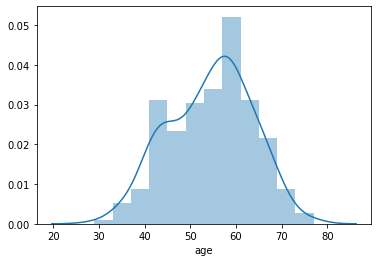

In [116]:
%matplotlib inline
sns.distplot(df['age']) 

The above cell creates a histogram of ages.

The peak age is about 60 years which represents the most common age. The data spread is from about 29 years to 76 years. Age is slightly skewed to the left because the mean of all ages is less than the mode.

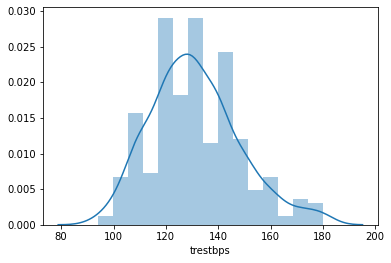

In [117]:
sns.distplot(df['trestbps']) 

The above cell creates a histogram of resting blood pressures.

The peak resting blood pressure is about 120mm Hg 137mm Hg. The data spread is from about 94mm Hg to 180mm Hg. Resting blood pressure is slightly to the right because the mean of all resting blood pressures is higher than the mode. 

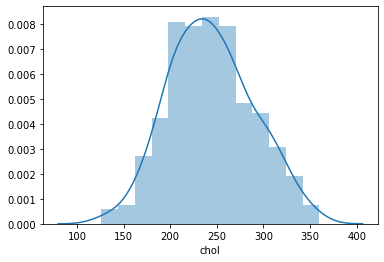

In [118]:
sns.distplot(df['chol']) 

The above cell creates a histogram of cholesterol levels.

The peak cholesterol is about 250mg/dl. The data spread is from about 126mg/dl to 394mg/dl. 

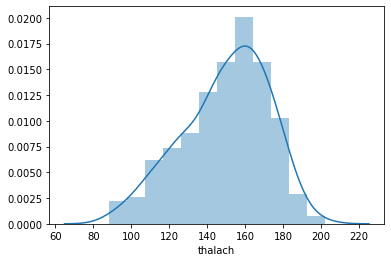

In [119]:
sns.distplot(df['thalach']) 

The above cell creates a histogram of maximum heart rates.

The peak maximum heart rate achieved is about 160 beats per minute. The data spread is from about 96 beats per minute to 202 beats per minute. Maximum heart rate achieved is skewed to the left because the mean of maximum heart rates is less than the mode.

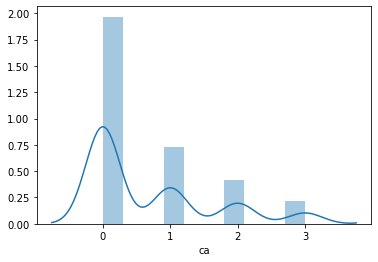

In [120]:
sns.distplot(df['ca']) 

The above cell creates a histogram of number of blood vessels.

The peak number of major vessels is 0. The data is spread from 0 vessels to 4 vessels. 

## Categorical Variables

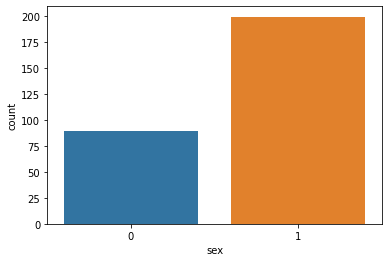

In [121]:
sns.countplot(df['sex'])

The above cell creates a bar chart of sex.

There are 199 males and 90 females.

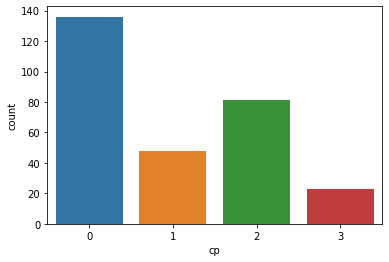

In [122]:
sns.countplot(df['cp'])

The above cell creates a bar chart of type of chest pain.

137 participants had typical angina, 48 had atypical angina, 81 had non-anginal pain, 23 were asymptomatic. (cp = type of pain)

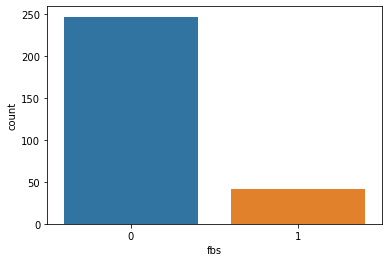

In [123]:
sns.countplot(df['fbs'])

The above cell creates a bar chart visualizing how many people had under and over 120mg/dl fasting blood sugar.

248 participants had under 120mg/dl fasting blood sugar and 41 participants had over 120mg/dl fasting blood sugar.

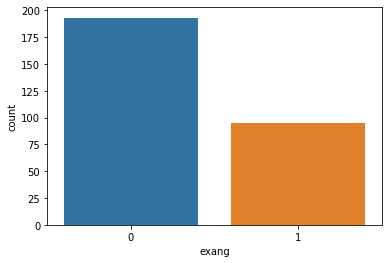

In [124]:
sns.countplot(df['exang'])

The above cell creates a bar chart of who had exercise induced angina and who did not.

194 participants did not have exercise induced angina and 95 participants did have exercise induced angina. 

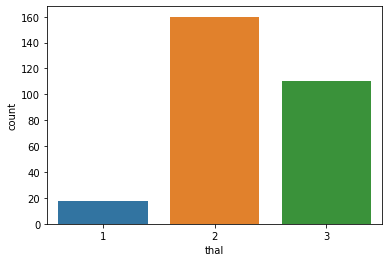

In [125]:
sns.countplot(df['thal'])

The above cell creates a bar chart that shows who had normal thalassemia, fixed defect thalassemia, or reversable defect thalassemia.

18 participants had normal thalassemia, 161 had fixed defect thalassemia, and 110 had reversable defect thalassemia. 

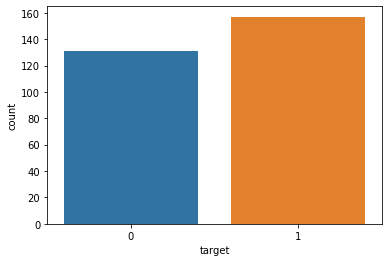

In [126]:
sns.countplot(df['target'])

The above cell creates a bar chart that shows who had heart disease and who did not.

131 participants did not have heart disease and 158 participants did have heart disease.

## Aggregation Charts

Here we do create a cross tab visualization showing the frequency of heart disease by sex (male and female). Here we see that even though our data is mostly men, women have a higher proportion of heart disease.

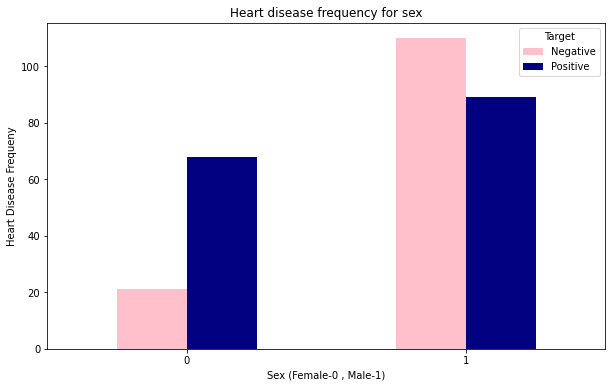

In [127]:
fig, ax = plt.subplots(figsize=(10, 6))

pd.crosstab(df.sex, df.target).plot(kind="bar",
                                    color=["pink", 'navy'],
                                    figsize=(10, 6),
                                    ax=ax);

ax.set(xlabel="Sex (Female-0 , Male-1)",
       ylabel="Heart Disease Frequeny",
       title="Heart disease frequency for sex");

plt.xticks(rotation=0);

ax.legend(['Negative','Positive'],title ="Target");

Here we do a scatterplot to see the spread of patients with heart disease and don't have heart disease with the max heart rate that they acheived. We see that as patients get older they seem to be less prone to heart disease and have a lower max heart rate than younger patients.

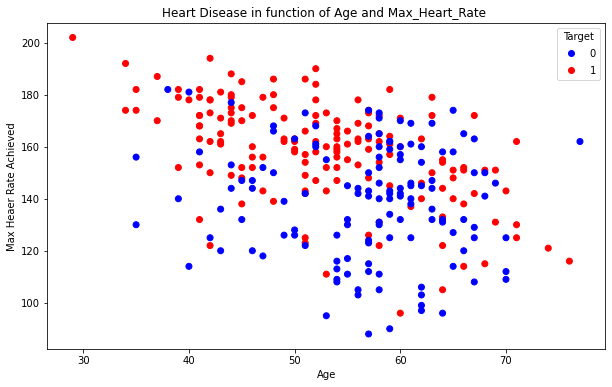

In [129]:
fig, ax = plt.subplots(figsize=(10, 6))

scatter = ax.scatter(x=df.age,
           y= df.thalach,
           c=df.target,
               cmap='bwr');

ax.set(xlabel="Age",ylabel="Max Heaer Rate Achieved",title="Heart Disease in function of Age and Max_Heart_Rate ")
ax.legend(*scatter.legend_elements(),title="Target");
plt.xticks(rotation=0);

Here we do another cross tab showing the heart disease frequency for each type of chest pain.

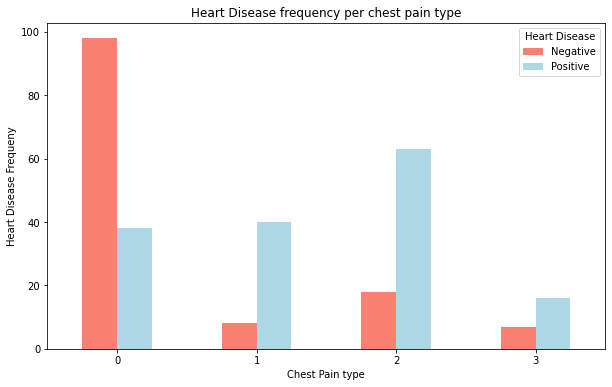

In [130]:
fig, ax = plt.subplots(figsize=(10, 6))

pd.crosstab(df.cp,df.target,).plot.bar(color=["salmon","lightblue"],ax=ax)

ax.set(xlabel="Chest Pain type",
       ylabel="Heart Disease Frequeny",
       title="Heart Disease frequency per chest pain type");

plt.xticks(rotation=0);

ax.legend(['Negative','Positive'],title ="Heart Disease");
 

## 8. Correlation analysis
Generate a correlation matrix and interpret it. Is multicollinearity an issue?

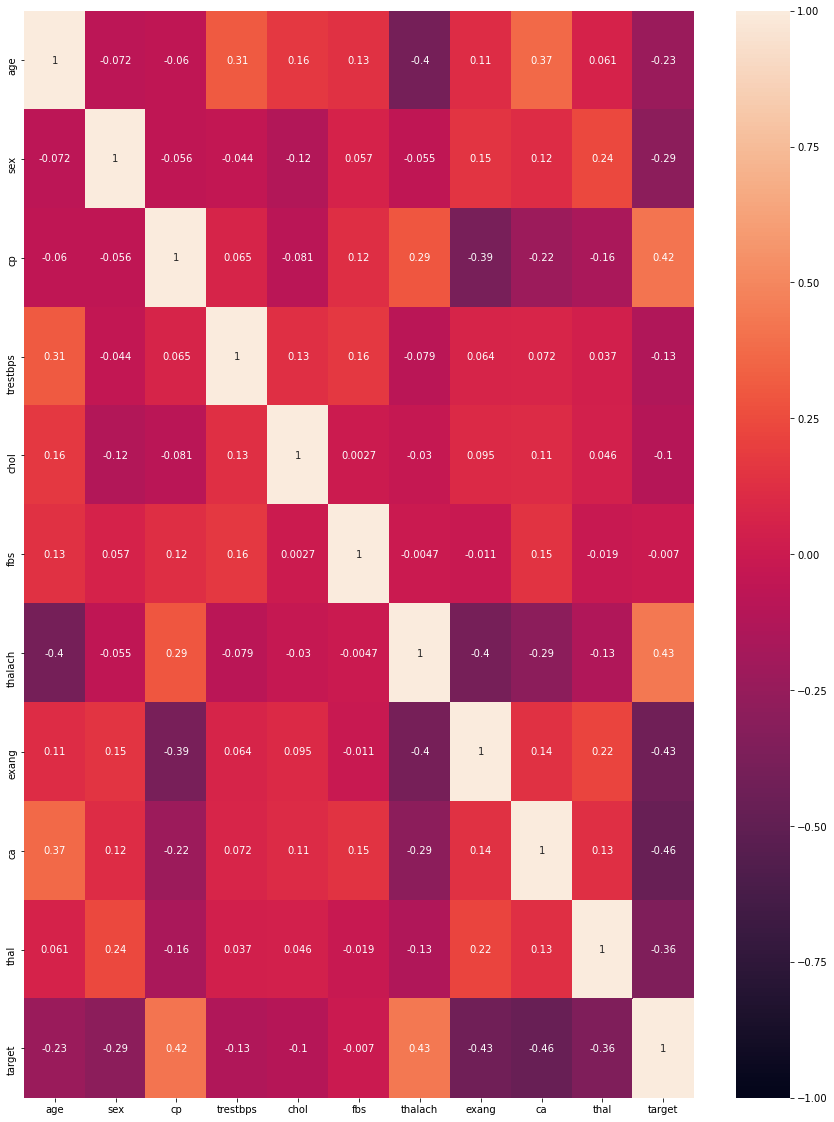

In [79]:
corrMatrix = df.corr()
plt.figure(figsize=(15,20))
sns.heatmap(corrMatrix, annot=True, vmin=-1.0, vmax=1.0)
plt.show()

Collinearity is a linear association between two predictors. Multicollinearity is a situation where two or more predictors are highly linearly related. In general, an absolute correlation coefficient of >0.7 among two or more predictors indicates the presence of multicollinearity.

For our data, we don't see any significantly high instances of collinearity or mutlicollinearity that would hurt out model by increasing the variance of our coefficient estiates.

## 9. Data preprocessing
In this step you conduct preprocessing. Different algorithms require different types of preprocessing so you may need to replicate this step multiple times for different models.

### 9.1. Dummies
Explain why or why not you need to create dummies. Create dummies below if needed.

We will create dummies for our variables that are categorical. We will rename the values for these variables to make the dummy variables easier to understand and interpret. We will also drop the first dummy varible to reduce the amount of variables at the end. 

In [80]:
df['sex'][df['sex'] == 0] = 'female'
df['sex'][df['sex'] == 1] = 'male'

df['cp'][df['cp'] == 0] = 'typical angina'
df['cp'][df['cp'] == 1] = 'atypical angina'
df['cp'][df['cp'] == 2] = 'non-anginal pain'
df['cp'][df['cp'] == 3] = 'asymptomatic'

df['fbs'][df['fbs'] == 0] = 'lower than 120mg/ml'
df['fbs'][df['fbs'] == 1] = 'greater than 120mg/ml'

df['exang'][df['exang'] == 0] = 'no'
df['exang'][df['exang'] == 1] = 'yes'

df['thal'][df['thal'] == 1] = 'normal'
df['thal'][df['thal'] == 2] = 'fixed defect'
df['thal'][df['thal'] == 3] = 'reversable defect'

df['sex'] = df['sex'].astype('category')
df['cp'] =df['cp'].astype('category')
df['fbs'] = df['fbs'].astype('category')
df['exang'] = df['exang'].astype('category')
df['thal'] = df['thal'].astype('category')

df = pd.get_dummies(df, drop_first=False)

Here we will use all the columns in our dataset as our predictors except our target variable and our target variable as our outcome variable.

In [81]:
predictors = list(df.columns)
predictors.remove('target')

outcome = 'target'

Let's take a look at our data types.

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 288 entries, 0 to 288
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   age                        288 non-null    int64
 1   trestbps                   288 non-null    int64
 2   chol                       288 non-null    int64
 3   thalach                    288 non-null    int64
 4   ca                         288 non-null    int64
 5   target                     288 non-null    int64
 6   sex_female                 288 non-null    uint8
 7   sex_male                   288 non-null    uint8
 8   cp_asymptomatic            288 non-null    uint8
 9   cp_atypical angina         288 non-null    uint8
 10  cp_non-anginal pain        288 non-null    uint8
 11  cp_typical angina          288 non-null    uint8
 12  fbs_greater than 120mg/ml  288 non-null    uint8
 13  fbs_lower than 120mg/ml    288 non-null    uint8
 14  exang_no                  

### 9.2. Normalization

Explain why or why not you need to normalize the data. Normalize it below if needed.

Here we will lay out how we met different preprocessing requirements for each method. We will use two dataframes for further analysis. One dataframe that is normalized with our dummy variables and one that is not normalized with our dummy variables. We need to normalize for logistic regression and KNN. We need to normalize for logistic regression because our numerical columns are on different scales. For example, age is typically from 0-100 years and cholesterol is typically from 100-400 mg/dl. We normalized for KNN because KNN does not make assumptions about the distribution of our data. 

In [83]:
norm_df = df.copy()

Creating a copy of our dataset.

In [84]:
cols_to_norm = ['age','trestbps', 'chol', 'thalach', 'ca']
norm_df[cols_to_norm] = norm_df[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

Normalize numerical columns by applying a lamda function. 

In [85]:
norm_df.head()

,age,trestbps,chol,thalach,ca,target,sex_female,sex_male,cp_asymptomatic,cp_atypical angina,cp_non-anginal pain,cp_typical angina,fbs_greater than 120mg/ml,fbs_lower than 120mg/ml,exang_no,exang_yes,thal_fixed defect,thal_normal,thal_reversable defect
0,0.708333,0.593023,0.457265,0.543860,0.0,1,0,1,1,0,0,0,1,0,1,0,0,1,0
1,0.166667,0.418605,0.529915,0.868421,0.0,1,0,1,0,0,1,0,0,1,1,0,1,0,0
2,0.250000,0.418605,0.333333,0.736842,0.0,1,1,0,0,1,0,0,0,1,1,0,1,0,0
3,0.562500,0.302326,0.470085,0.789474,0.0,1,0,1,0,1,0,0,0,1,1,0,1,0,0
4,0.583333,0.302326,0.974359,0.657895,0.0,1,1,0,0,0,0,1,0,1,0,1,1,0,0


## 10. Modeling
Please refer to project description for the requirements.

## Logistic Regression

In [86]:
X = norm_df[predictors]
y = norm_df[outcome]

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_reg.fit(train_X, train_y)

LR_score = logit_reg.score(train_X, train_y)
ylr = logit_reg.predict(train_X)

pd.set_option('display.width', 95)
pd.set_option('precision',3)
pd.set_option('max_columns', 33)
print('intercept ', logit_reg.intercept_[0])

print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X.columns).transpose())
print()
print('AIC', AIC_score(valid_y, logit_reg.predict(valid_X), df=len(train_X.columns) + 1))
pd.reset_option('display.width')
pd.reset_option('precision')
pd.reset_option('max_columns')

intercept  0.2303653319726274
         age  trestbps   chol  thalach     ca  sex_female  sex_male  cp_asymptomatic  \
coeff  2.604    -2.688 -1.883     3.69 -4.539       0.906    -0.676           -0.308   

       cp_atypical angina  cp_non-anginal pain  cp_typical angina  fbs_greater than 120mg/ml  \
coeff               0.848                0.848             -1.157                      0.425   

       fbs_lower than 120mg/ml  exang_no  exang_yes  thal_fixed defect  thal_normal  \
coeff                   -0.195     0.723     -0.492              1.063       -0.253   

       thal_reversable defect  
coeff                   -0.58  

AIC 170.94188031106285


Assigned predictors to X and outcome to y. 
Separate into train and test partitions. 
Run logistic regression.
Format how the output will look and calculate intercept.
Format how output will look and calculate coefficients and AIC score.

In [87]:
classificationSummary(train_y, logit_reg.predict(train_X))
classificationSummary(valid_y, logit_reg.predict(valid_X))

Confusion Matrix (Accuracy 0.8953)

       Prediction
Actual  0  1
     0 64 10
     1  8 90
Confusion Matrix (Accuracy 0.8190)

       Prediction
Actual  0  1
     0 40 17
     1  4 55


Run confusion matrix on training and testing sets.

In [88]:
print (classification_report(train_y, ylr))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        74
           1       0.90      0.92      0.91        98

    accuracy                           0.90       172
   macro avg       0.89      0.89      0.89       172
weighted avg       0.90      0.90      0.90       172



Run classification report to find precision and F-1 score.

## Random Forest 

In [89]:
X = df.drop(columns=['target'])
y = df['target']

Assign X to all columns but target. Assign y to target.

In [90]:
df.head()

,age,trestbps,chol,thalach,ca,target,sex_female,sex_male,cp_asymptomatic,cp_atypical angina,cp_non-anginal pain,cp_typical angina,fbs_greater than 120mg/ml,fbs_lower than 120mg/ml,exang_no,exang_yes,thal_fixed defect,thal_normal,thal_reversable defect
0,63,145,233,150,0,1,0,1,1,0,0,0,1,0,1,0,0,1,0
1,37,130,250,187,0,1,0,1,0,0,1,0,0,1,1,0,1,0,0
2,41,130,204,172,0,1,1,0,0,1,0,0,0,1,1,0,1,0,0
3,56,120,236,178,0,1,0,1,0,1,0,0,0,1,1,0,1,0,0
4,57,120,354,163,0,1,1,0,0,0,0,1,0,1,0,1,1,0,0


In [91]:
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

rf = RandomForestClassifier(n_estimators=500, random_state=1)
rf.fit(train_X, train_y)

LR_score = rf.score(train_X, train_y)
ylr = rf.predict(train_X)

Split data into train and test partitions. 
Run Random Forest.

                      feature  importance       std
11  fbs_greater than 120mg/ml    0.008325  0.013624
12    fbs_lower than 120mg/ml    0.008475  0.012619
16                thal_normal    0.009754  0.021180
5                  sex_female    0.013108  0.021874
8          cp_atypical angina    0.013857  0.025401
7             cp_asymptomatic    0.014132  0.021104
6                    sex_male    0.014710  0.024198
9         cp_non-anginal pain    0.023647  0.035316
14                  exang_yes    0.037319  0.061442
13                   exang_no    0.041394  0.068424
17     thal_reversable defect    0.062932  0.086772
2                        chol    0.075896  0.046039
10          cp_typical angina    0.081464  0.093789
1                    trestbps    0.082069  0.046998
0                         age    0.087996  0.056394
15          thal_fixed defect    0.105648  0.125196
4                          ca    0.152142  0.109309
3                     thalach    0.167133  0.117339


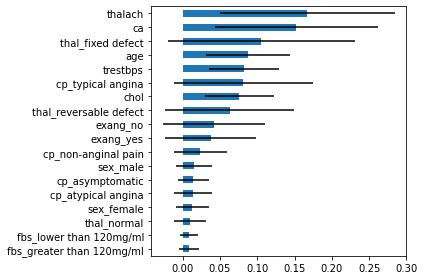

In [92]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

df1 = pd.DataFrame({'feature': train_X.columns, 'importance': importances, 'std': std})
df1 = df1.sort_values('importance')
print(df1)

ax = df1.plot(kind='barh', xerr='std', x='feature', legend=False)
ax.set_ylabel('')

plt.tight_layout()
plt.show()

Define importances from results from Random Forest.
Define standard deviation from results from Random Forest.
Create new data frame from results and order by importance.
Show dataframe.
Set Axes, legend, and how importances and std are formatted on the chart.
Show chart.

In [93]:
classificationSummary(valid_y, rf.predict(valid_X))

Confusion Matrix (Accuracy 0.8103)

       Prediction
Actual  0  1
     0 38 19
     1  3 56


Run confusion matrix.

In [94]:
print (classification_report(train_y, ylr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        74
           1       1.00      1.00      1.00        98

    accuracy                           1.00       172
   macro avg       1.00      1.00      1.00       172
weighted avg       1.00      1.00      1.00       172



Run classification report to see precision and F1-score.

## KNN

Split our data into training and validation sets.

In [95]:
trainData, validData = train_test_split(norm_df, test_size=0.4, random_state=26)
print(trainData.shape, validData.shape)

(172, 19) (116, 19)


Further split our data

In [96]:
train_X = trainData[predictors]
train_y = trainData[outcome]
valid_X = validData[predictors]
valid_y = validData[outcome]

Train a classifier for different values of k (1-15), test performance on validation set, then convert results to a pandas data frame in order to see accuracy for each value of k.

In [97]:
results = []
for k in range(1, 16):
    knn = KNeighborsClassifier(n_neighbors=k).fit(train_X, train_y)
    results.append({
        'k': k,
        'accuracy': accuracy_score(valid_y, knn.predict(valid_X))
    })

results = pd.DataFrame(results)
print(results)

     k  accuracy
0    1  0.715517
1    2  0.767241
2    3  0.750000
3    4  0.801724
4    5  0.793103
5    6  0.827586
6    7  0.793103
7    8  0.818966
8    9  0.818966
9   10  0.836207
10  11  0.818966
11  12  0.818966
12  13  0.818966
13  14  0.836207
14  15  0.818966


We see that the first k with the highest accuracy is k=10, so we will fit a KNN model with k=10. We further visualize what our error rate is with other k values to best determine what is the most ideal value for k.

Text(0, 0.5, 'Mean Error')

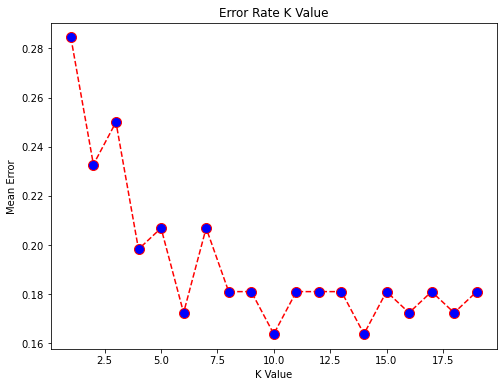

In [98]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_X, train_y)
    pred_i = knn.predict(valid_X)
    error.append(np.mean(pred_i != valid_y))

%matplotlib inline
plt.figure(figsize=(8, 6))
plt.plot(range(1, 20), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

Fit KNN model to k=10

In [133]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(train_X,train_y)

knn_prediction = knn.predict(valid_X)

Run classification report to find precision and F-1 score.

In [134]:
print(classification_report(knn_prediction,valid_y))

              precision    recall  f1-score   support

           0       0.76      0.88      0.82        48
           1       0.90      0.81      0.85        68

    accuracy                           0.84       116
   macro avg       0.83      0.84      0.83       116
weighted avg       0.84      0.84      0.84       116



## ROC Curve

Here we assign our predictors to X and our target variable to y for splitting.

In [103]:
X = norm_df[predictors]
y = norm_df[outcome]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=1)

We define a list of our methods that we will use in a for loop to fit to our data. We will then append the results of our methods to a dataframe to plot. We will plot all our methods on an ROC curve to determine what the best model is.

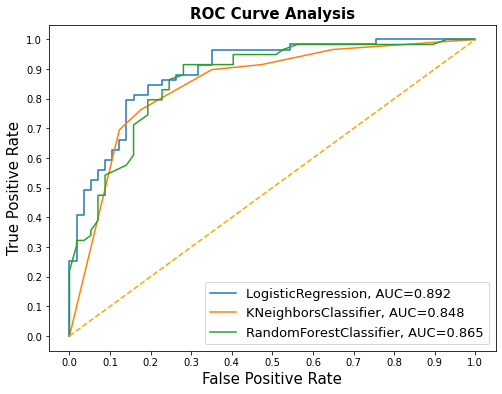

In [107]:
classifiers = [LogisticRegression(), 
               KNeighborsClassifier(), 
               RandomForestClassifier()]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)
    


# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)


fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

By acknowledging the top left most curve, we see that our best model is Logstic Regression. Logistic Regression also has the highest AUC curve. 